In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import seaborn as sns

In [37]:
file_path = "/content/drive/MyDrive/Kovai.co Forecasting/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250526.csv"

In [38]:
data = pd.read_csv(file_path)

In [39]:
data.head()

Date  Local Route  Light Rail  Peak Service  Rapid Route  School  \
0  30/08/2024        16436       10705           225        19026    3925   
1  15/09/2023        15499       10671           267        18421    4519   
2  28/12/2021         1756        2352             0         3775       0   
3  11/01/2023        10536        8347           223        14072       0   
4  11/09/2021          820         612             0         1283       0   

   Other  
0   59.0  
1   61.0  
2   13.0  
3   48.0  
4   11.0

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1918 non-null   object 
 1   Local Route   1918 non-null   int64  
 2   Light Rail    1918 non-null   int64  
 3   Peak Service  1918 non-null   int64  
 4   Rapid Route   1918 non-null   int64  
 5   School        1918 non-null   int64  
 6   Other         1898 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 105.0+ KB


In [41]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data = data.sort_values('Date')
data.set_index('Date', inplace=True)
data['Other'] = data['Other'].fillna(method='ffill')


<ipython-input-41-da98ca12e630>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Other'] = data['Other'].fillna(method='ffill')


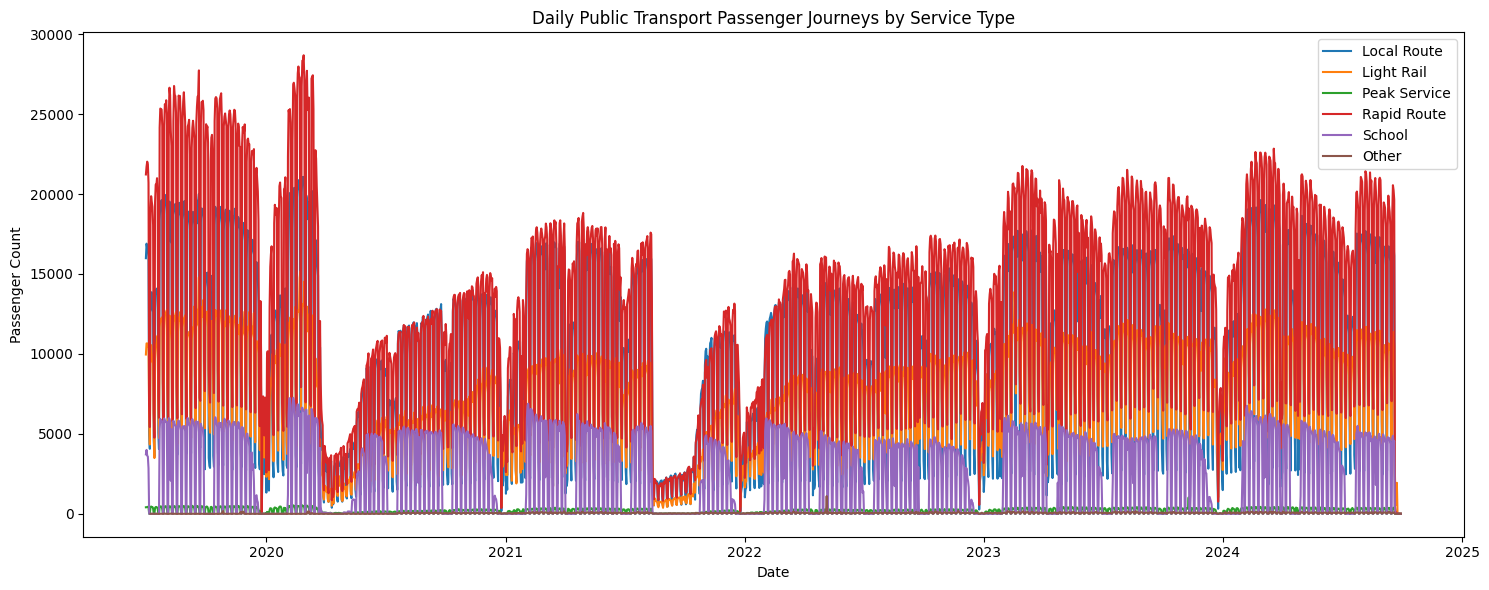

In [42]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 6))
for column in data.columns:
    if column != 'weekday':
        plt.plot(data.index, data[column], label=column)

plt.title("Daily Public Transport Passenger Journeys by Service Type")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Rapid Route'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -3.8281016528348717
p-value: 0.0026325357298384133


In [24]:
train = data['Rapid Route'][:-30]
test = data['Rapid Route'][-30:]


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


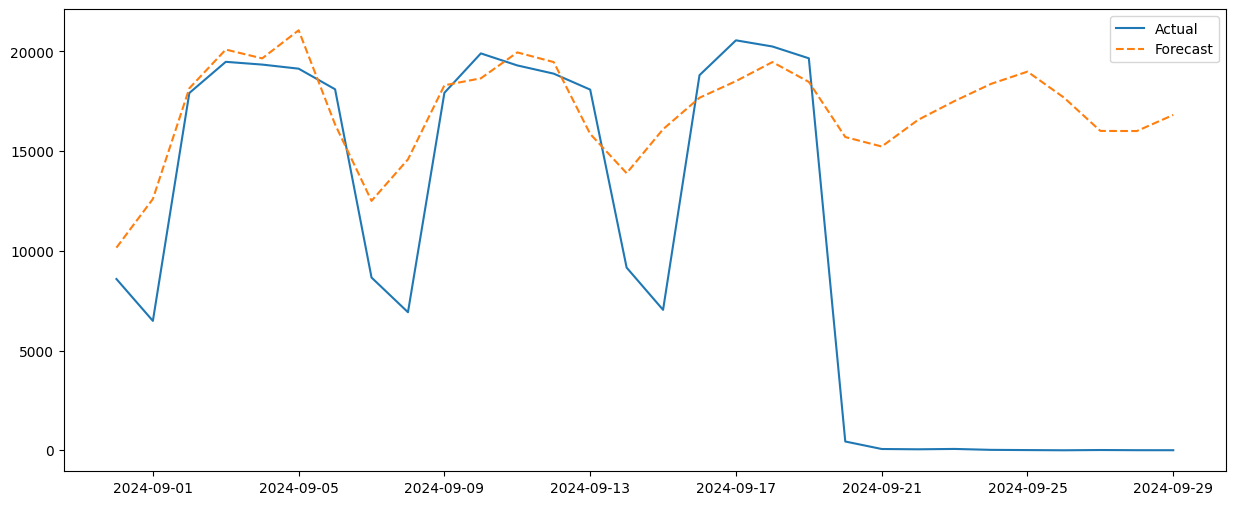

In [26]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)


# Plot
plt.figure(figsize=(15, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.show()


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'MAE: {mae:.2f}, RMSE: {rmse:.2f}')


MAE: 7207.81, RMSE: 10138.02


/usr/local/lib/python3.11/dist-packages/seaborn/_base.py:1135: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  converter.update_units(seed_data)


ConversionError: Failed to convert value(s) to axis units: array([Period('2019-07-01', 'D'), Period('2019-07-02', 'D'),
       Period('2019-07-03', 'D'), ..., Period('2024-09-27', 'D'),
       Period('2024-09-28', 'D'), Period('2024-09-29', 'D')], dtype=object)

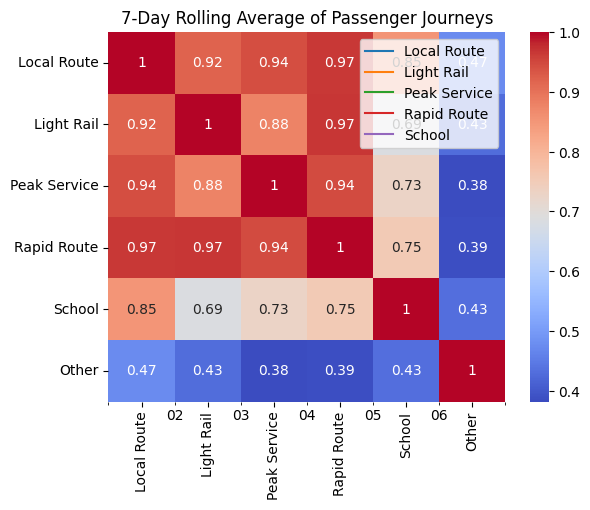

In [31]:
data_rolling = data[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].rolling(window=7).mean()
data_rolling.plot(title="7-Day Rolling Average of Passenger Journeys")


import seaborn as sns
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")


data['is_weekend'] = data.index.dayofweek >= 5
sns.boxplot(x='is_weekend', y='School', data=data.reset_index())


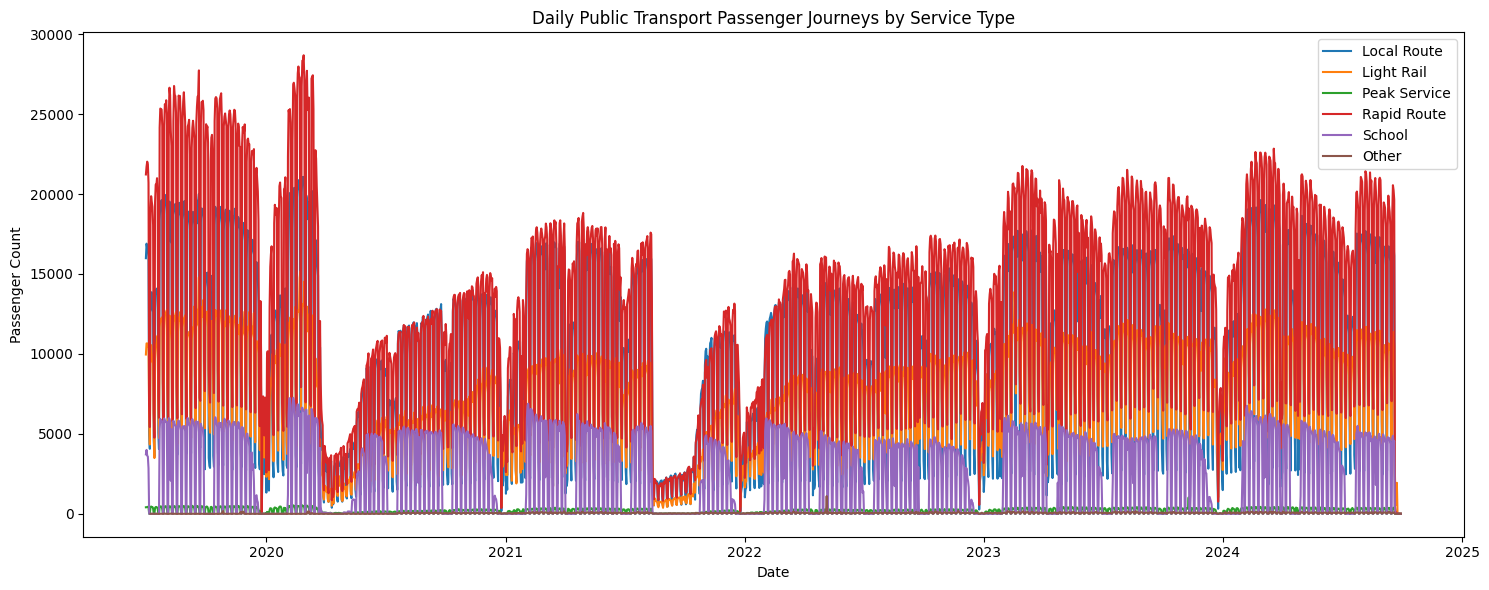

In [43]:
import matplotlib.pyplot as plt


data.index = pd.to_datetime(data.index)


plt.figure(figsize=(15, 6))
for column in data.columns:
    if column not in ['weekday', 'is_weekend']:
        plt.plot(data.index, data[column], label=column)

plt.title("Daily Public Transport Passenger Journeys by Service Type")
plt.xlabel("Date")
plt.ylabel("Passenger Count")
plt.legend()
plt.tight_layout()
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnbe4porb/hogwrlam.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnbe4porb/krertkoe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65197', 'data', 'file=/tmp/tmpnbe4porb/hogwrlam.json', 'init=/tmp/tmpnbe4porb/krertkoe.json', 'output', 'file=/tmp/tmpnbe4porb/prophet_modelzlsf866g/prophet_model-20250526062910.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:29:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:29:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-70-8a88ced8ca3f>:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_lay

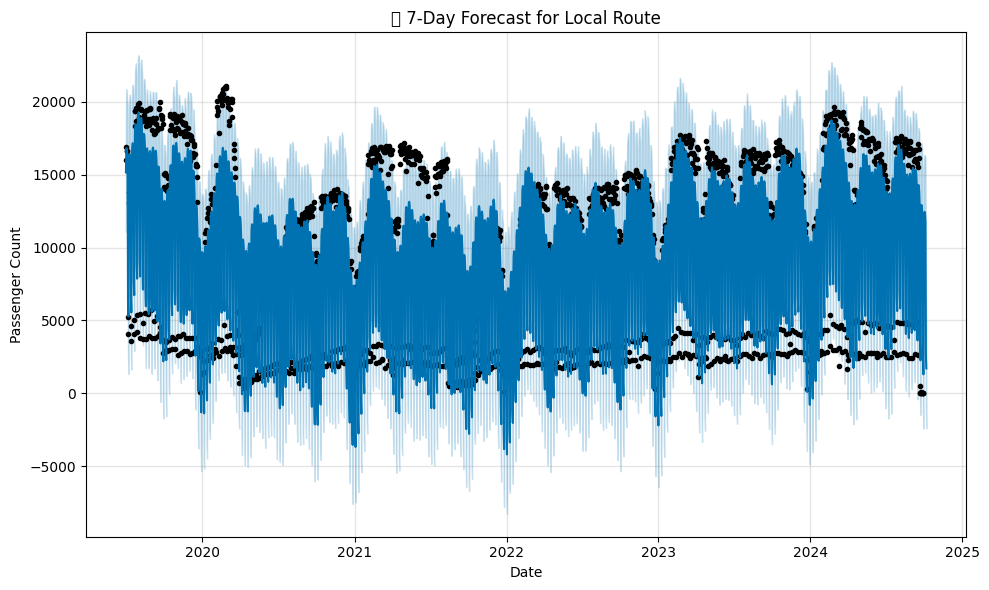

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnbe4porb/nf875dih.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnbe4porb/9bh2wt__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7314', 'data', 'file=/tmp/tmpnbe4porb/nf875dih.json', 'init=/tmp/tmpnbe4porb/9bh2wt__.json', 'output', 'file=/tmp/tmpnbe4porb/prophet_modelgdr6zcey/prophet_model-20250526062913.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:29:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:29:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-70-8a88ced8ca3f>:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layo

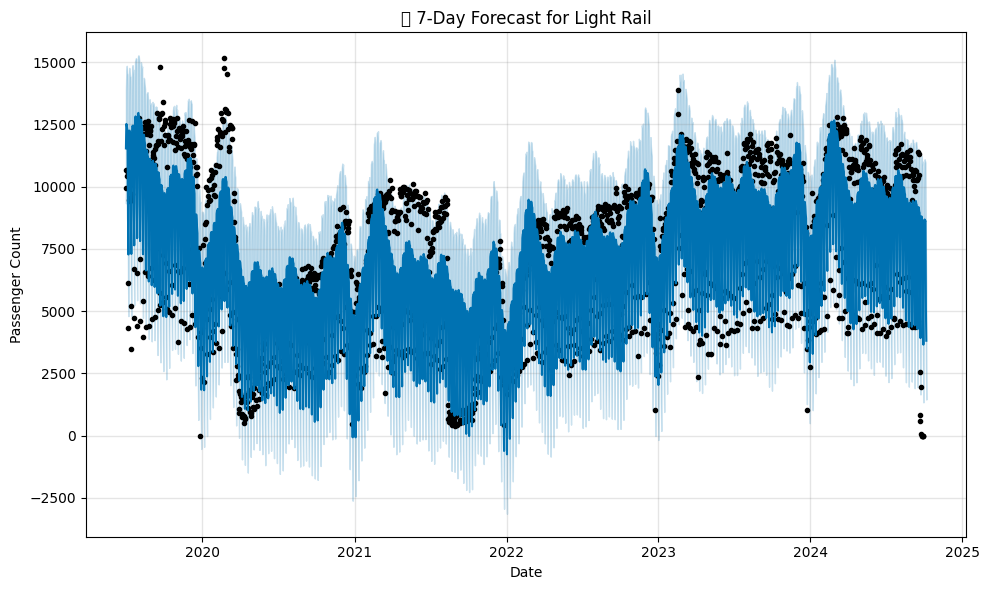

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnbe4porb/avnj1thb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnbe4porb/zlciqlry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37860', 'data', 'file=/tmp/tmpnbe4porb/avnj1thb.json', 'init=/tmp/tmpnbe4porb/zlciqlry.json', 'output', 'file=/tmp/tmpnbe4porb/prophet_model4yfuav2f/prophet_model-20250526062915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:29:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:29:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-70-8a88ced8ca3f>:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_lay

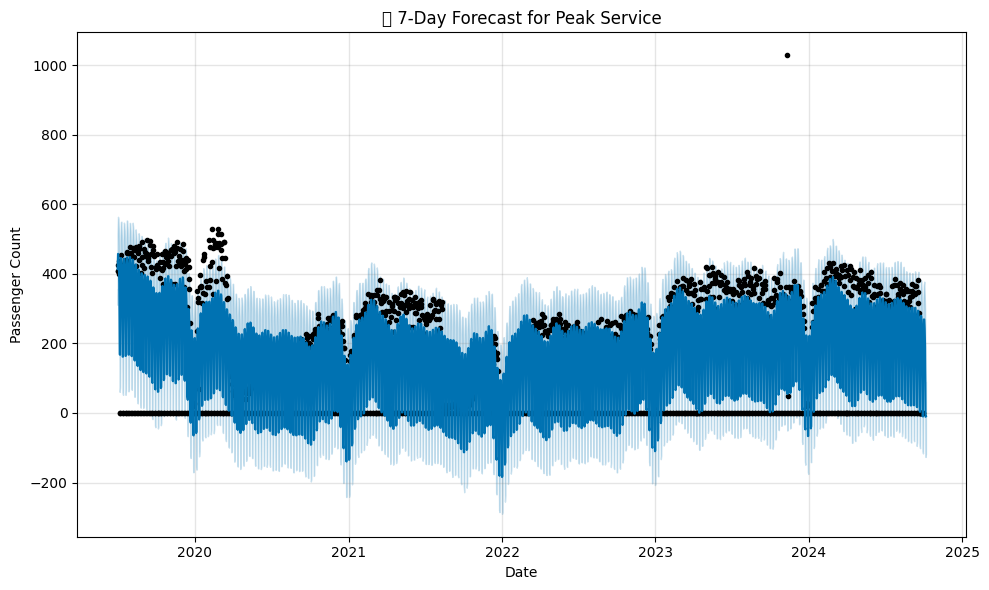

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnbe4porb/gpo6vvv_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnbe4porb/81c6qevj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86940', 'data', 'file=/tmp/tmpnbe4porb/gpo6vvv_.json', 'init=/tmp/tmpnbe4porb/81c6qevj.json', 'output', 'file=/tmp/tmpnbe4porb/prophet_modelirxv9mv2/prophet_model-20250526062916.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:29:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:29:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-70-8a88ced8ca3f>:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_lay

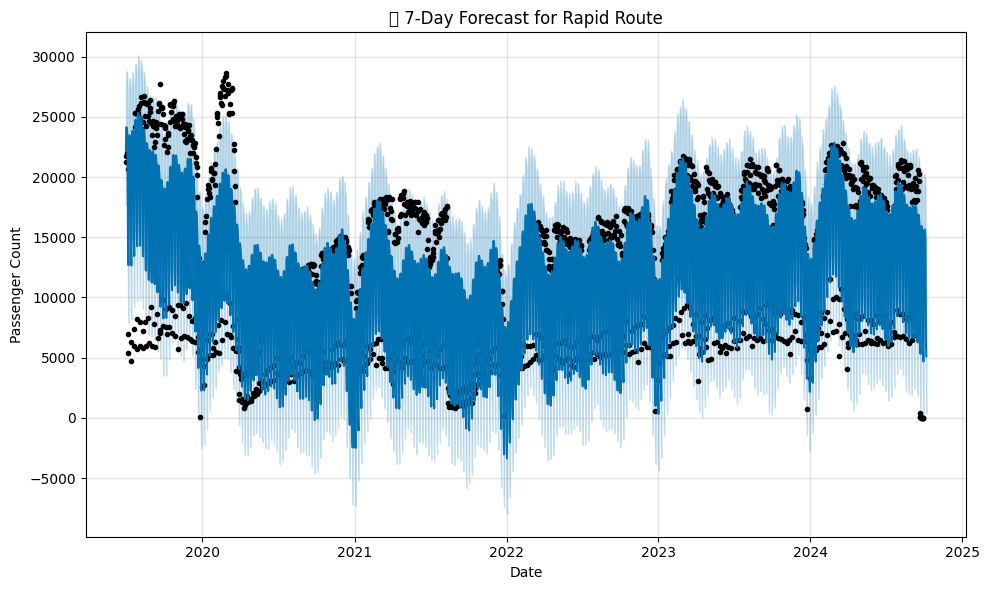

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnbe4porb/4_sc2lrz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnbe4porb/jlis6jp2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55936', 'data', 'file=/tmp/tmpnbe4porb/4_sc2lrz.json', 'init=/tmp/tmpnbe4porb/jlis6jp2.json', 'output', 'file=/tmp/tmpnbe4porb/prophet_modelzovd3641/prophet_model-20250526062917.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:29:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:29:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-70-8a88ced8ca3f>:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_lay

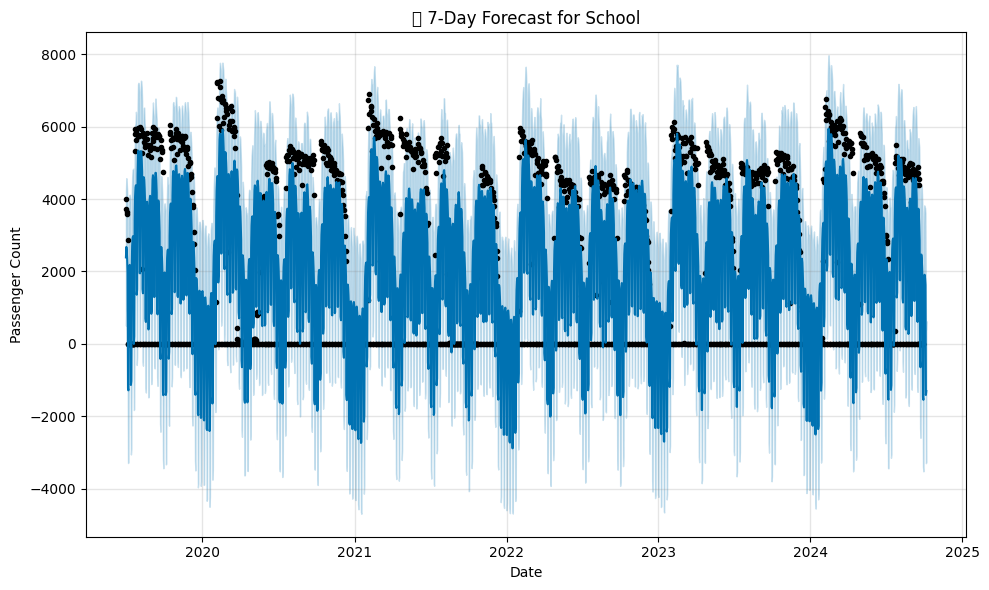

In [70]:
from prophet import Prophet
import matplotlib.pyplot as plt

forecast_cols = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']
future_days = 7
forecasts = {}

for col in forecast_cols:
    temp = data[[col]].reset_index().rename(columns={"Date": "ds", col: "y"})
    model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
    model.fit(temp)

    future = model.make_future_dataframe(periods=future_days)
    forecast = model.predict(future)
    forecasts[col] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    # Plotting
    fig = model.plot(forecast)
    plt.title(f"📈 7-Day Forecast for {col}")
    plt.xlabel("Date")
    plt.ylabel("Passenger Count")
    plt.tight_layout()
    plt.show()


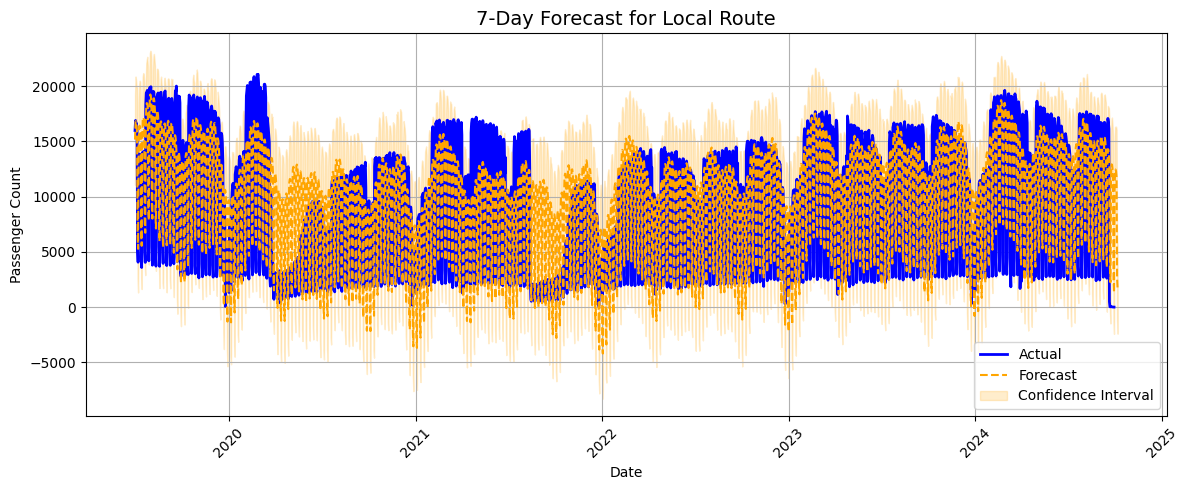

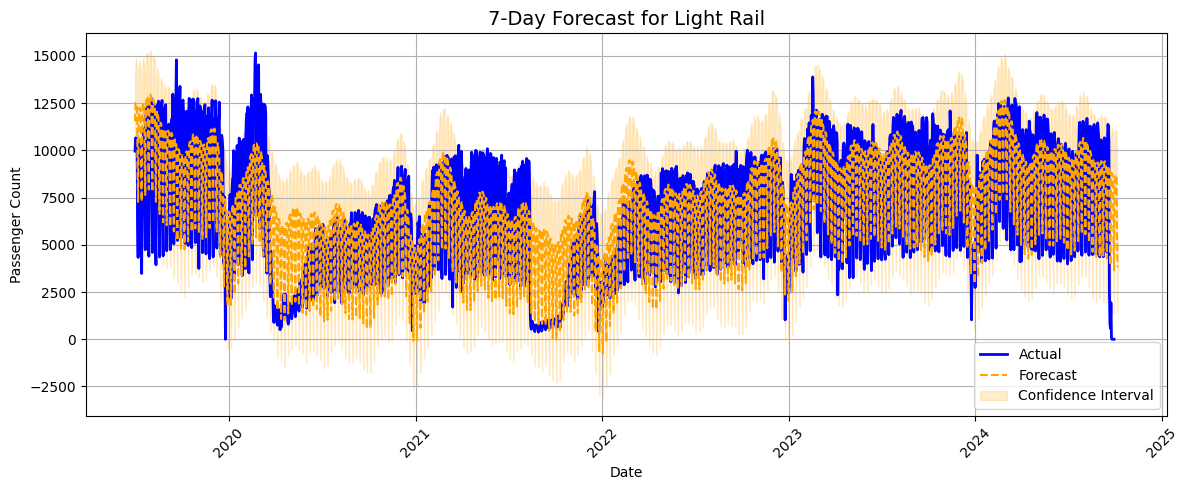

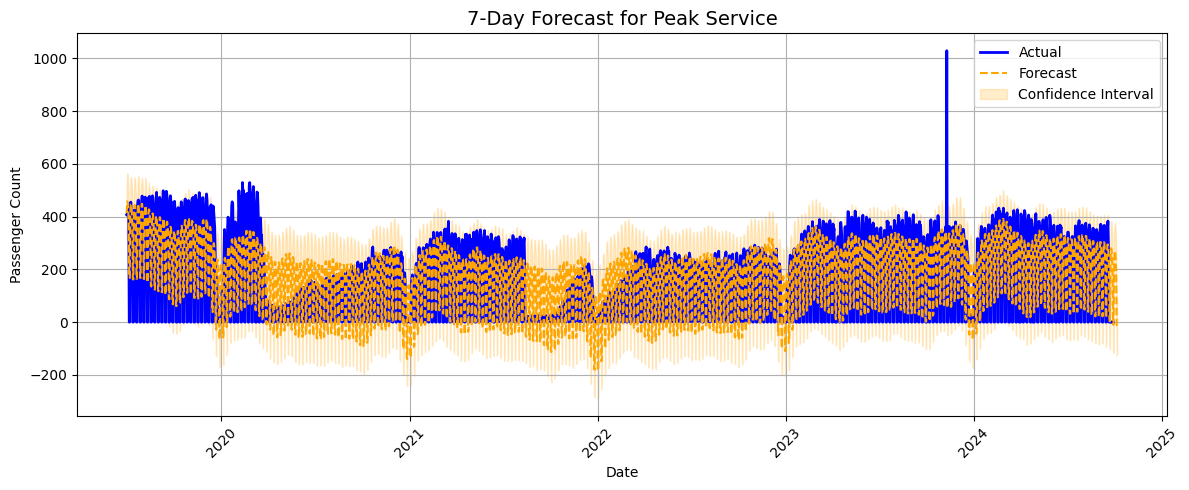

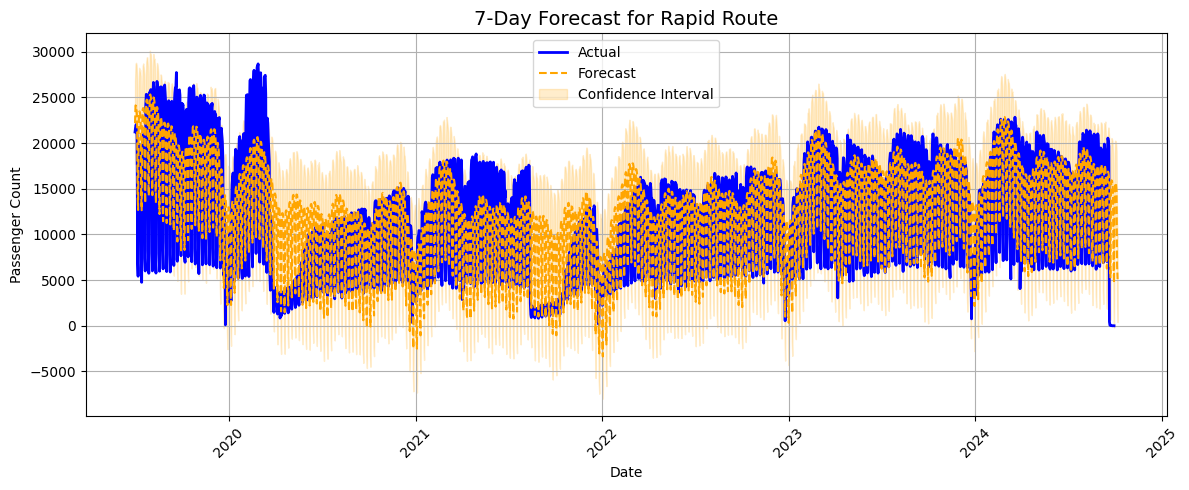

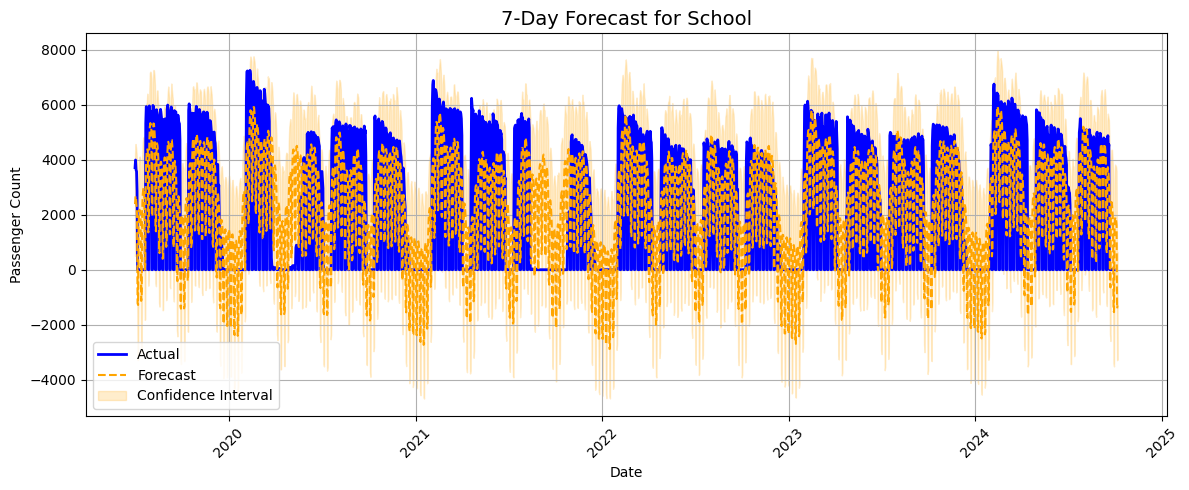

In [71]:
import matplotlib.pyplot as plt

for col in forecast_cols:
    forecast = forecasts[col]
    temp = data[[col]].reset_index().rename(columns={"Date": "ds", col: "y"})

    plt.figure(figsize=(12, 5))

    # Plot actual data
    plt.plot(temp['ds'], temp['y'], label='Actual', color='blue', linewidth=2)

    # Plot forecast
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange', linestyle='--')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2, label='Confidence Interval')

    # Styling
    plt.title(f"7-Day Forecast for {col}", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Passenger Count")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [49]:
max_local = data['Local Route'].max()
max_local_date = data['Local Route'].idxmax().date()
print(f"1. Highest recorded 'Local Route' traffic: {max_local} on {max_local_date}")


1. Highest recorded 'Local Route' traffic: 21070 on 2020-02-27


In [50]:
std_light_rail = data['Light Rail'].std()
print(f"2. Light Rail has the least variability: Std Dev = {std_light_rail:.2f}")


2. Light Rail has the least variability: Std Dev = 3345.62


In [51]:
zero_school_dates = data[data['School'] == 0].index.date
print(f"3. 'School' services drop to zero during holidays. First such instance: {zero_school_dates[0]}")


3. 'School' services drop to zero during holidays. First such instance: 2019-07-06


In [52]:
weekday_avg = data.groupby(data.index.day_name()).mean()
sorted_avg = weekday_avg.mean(axis=1).sort_values(ascending=False)

print("4. Average passenger traffic by weekday (descending):")
print(sorted_avg)
print("=> Passenger trends show weekday dominance (especially on: {})".format(sorted_avg.idxmax()))


4. Average passenger traffic by weekday (descending):
Date
Wednesday    6972.741440
Tuesday      6928.756693
Thursday     6850.835791
Friday       6563.233338
Monday       6023.254519
Saturday     2488.658109
Sunday       1808.526022
dtype: float64
=> Passenger trends show weekday dominance (especially on: Wednesday)


In [53]:
weekend_data = data[data.index.dayofweek >= 5]
weekday_data = data[data.index.dayofweek < 5]

weekend_avg = weekend_data.mean().mean()
weekday_avg = weekday_data.mean().mean()

print(f"5. Average weekday passenger count: {weekday_avg:.2f}")
print(f"   Average weekend passenger count: {weekend_avg:.2f}")
print("=> Clear drop during weekends/holidays.")


5. Average weekday passenger count: 6667.76
   Average weekend passenger count: 2148.59
=> Clear drop during weekends/holidays.


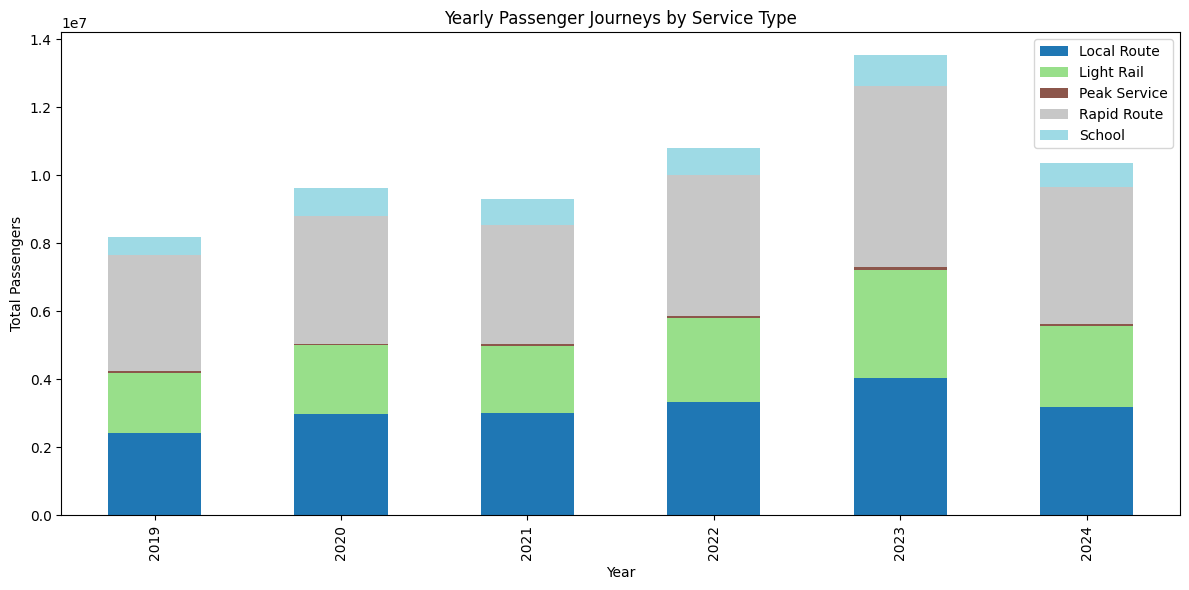

In [54]:

data['Year'] = data.index.year


yearly_totals = data.groupby('Year')[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].sum()


yearly_totals.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title("Yearly Passenger Journeys by Service Type")
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.tight_layout()
plt.show()


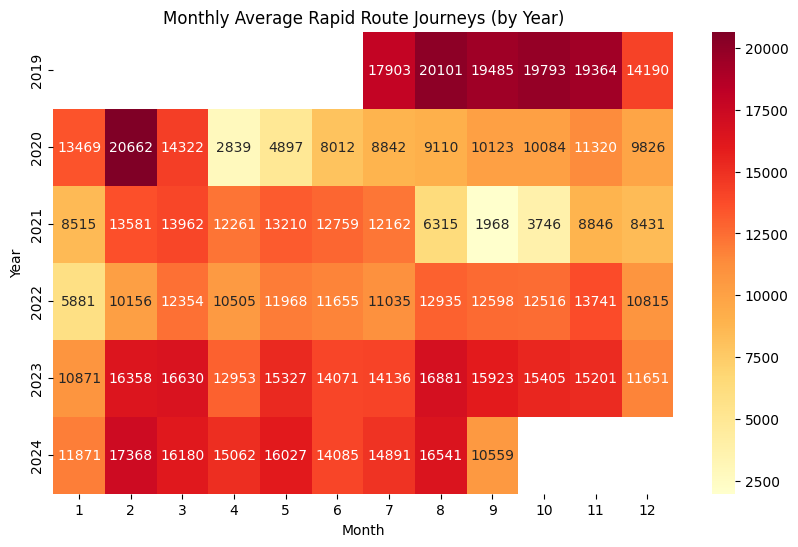

In [56]:
data['Month'] = data.index.month
monthly_pivot = data.pivot_table(index=data.index.year, columns='Month',
                                  values='Rapid Route', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(monthly_pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Monthly Average Rapid Route Journeys (by Year)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()


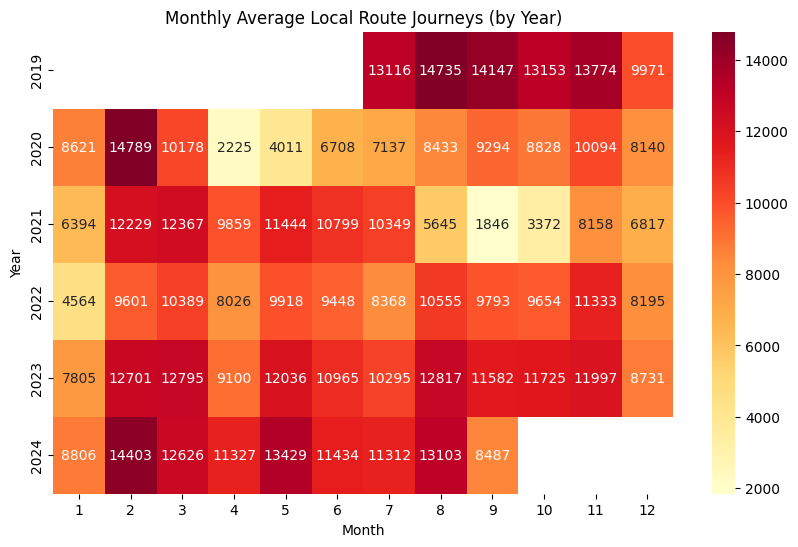

In [58]:
data['Month'] = data.index.month
monthly_pivot = data.pivot_table(index=data.index.year, columns='Month',
                                  values='Local Route', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(monthly_pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Monthly Average Local Route Journeys (by Year)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

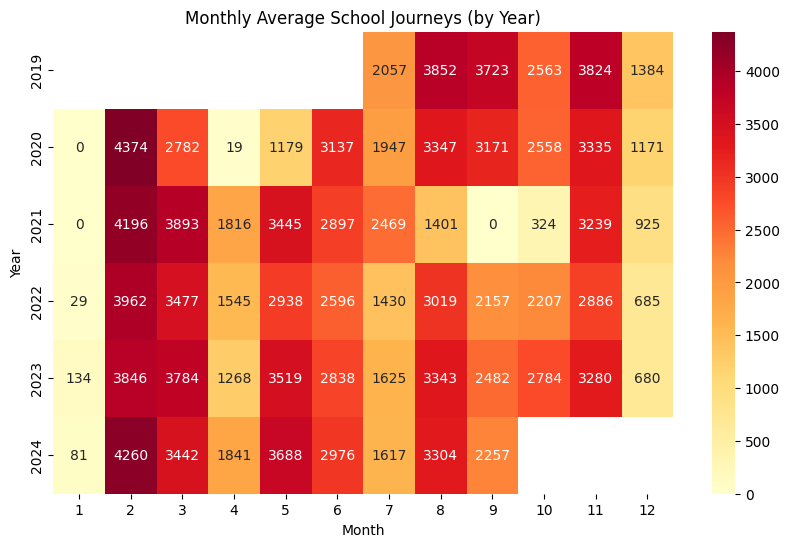

In [60]:
data['Month'] = data.index.month
monthly_pivot = data.pivot_table(index=data.index.year, columns='Month',
                                  values='School', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(monthly_pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Monthly Average School Journeys (by Year)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

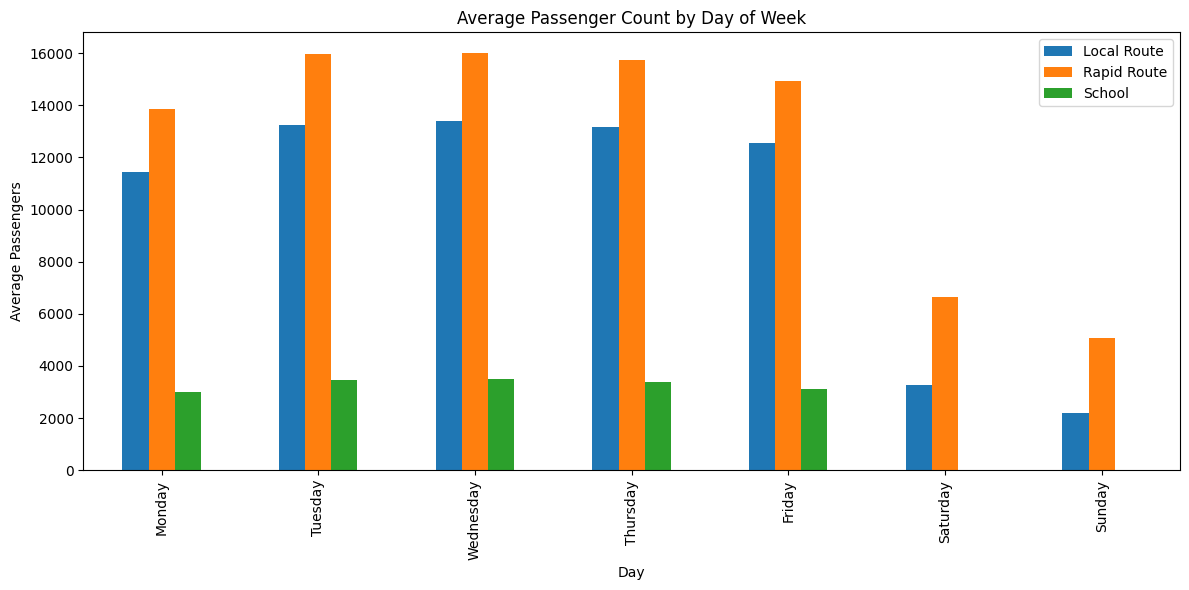

In [61]:

data['Day'] = data.index.day_name()

weekday_means = data.groupby('Day')[['Local Route', 'Rapid Route', 'School']].mean()


ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_means = weekday_means.loc[ordered_days]

weekday_means.plot(kind='bar', figsize=(12, 6))
plt.title("Average Passenger Count by Day of Week")
plt.ylabel("Average Passengers")
plt.tight_layout()
plt.show()


In [62]:

data['Total'] = data[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']].sum(axis=1)


top5 = data['Total'].nlargest(5)
print("Top 5 busiest days:\n", top5)

bottom5 = data['Total'].nsmallest(5)
print("Bottom 5 quietest days:\n", bottom5)


Top 5 busiest days:
 Date
2020-02-27    69752.0
2020-02-25    69690.0
2020-02-26    69343.0
2020-02-21    68895.0
2020-02-28    68765.0
Name: Total, dtype: float64
Bottom 5 quietest days:
 Date
2024-09-29     4.0
2024-09-28     5.0
2024-09-26    11.0
2024-09-27    19.0
2024-09-25    40.0
Name: Total, dtype: float64


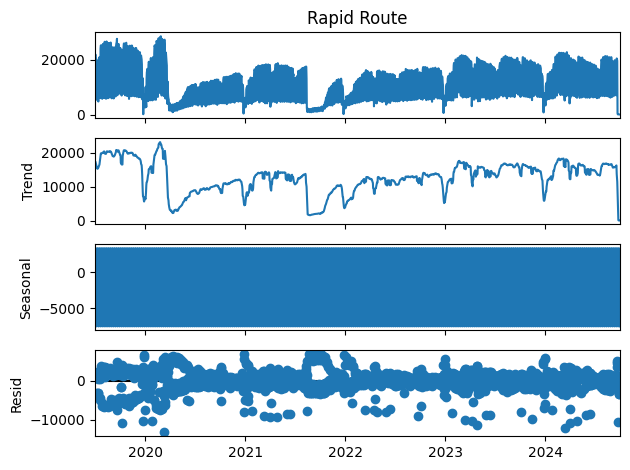

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Rapid Route'], model='additive', period=7)
result.plot()
plt.tight_layout()
plt.show()


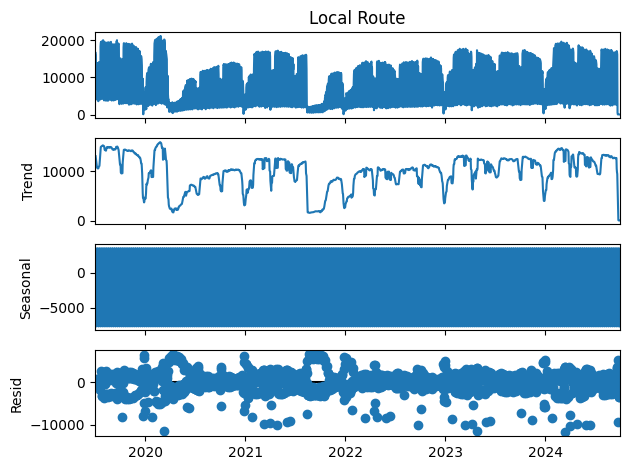

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Local Route'], model='additive', period=7)
result.plot()
plt.tight_layout()
plt.show()


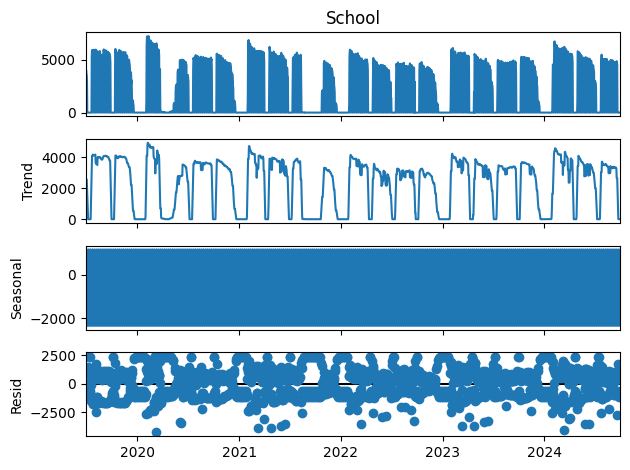

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['School'], model='additive', period=7)
result.plot()
plt.tight_layout()
plt.show()


<ipython-input-66-3beade6595ac>:13: UserWarning: Glyph 128653 (\N{ONCOMING BUS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1600x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128653 (\N{ONCOMING BUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128653 (\N{ONCOMING BUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


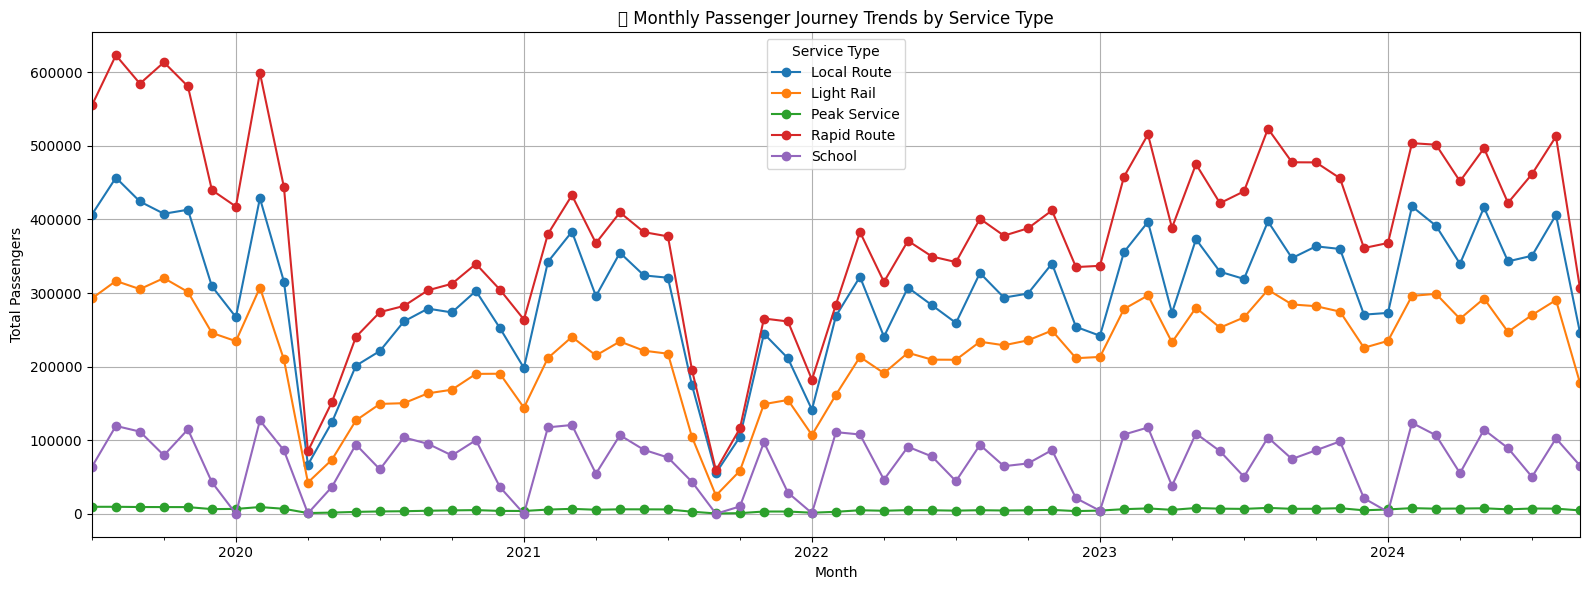

In [66]:
monthly_totals = data.copy()
monthly_totals['YearMonth'] = monthly_totals.index.to_period("M")
monthly_grouped = monthly_totals.groupby('YearMonth')[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].sum()


plt.figure(figsize=(16, 6))
monthly_grouped.plot(kind='line', marker='o', figsize=(16, 6))
plt.title("🚍 Monthly Passenger Journey Trends by Service Type")
plt.xlabel("Month")
plt.ylabel("Total Passengers")
plt.grid(True)
plt.legend(title="Service Type")
plt.tight_layout()
plt.show()


In [67]:
insights = {}

# 1. Top route overall
total_per_route = data[['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']].sum()
insights['Top Service Type'] = total_per_route.idxmax()

# 2. Peak usage day for each route
for route in ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School']:
    peak_day = data[route].idxmax().date()
    peak_val = data[route].max()
    insights[f'Peak {route}'] = f"{peak_val} on {peak_day}"

# 3. Contribution percentage
total = total_per_route.sum()
contribution = (total_per_route / total * 100).round(2)
insights['Service Contribution %'] = contribution.to_dict()

# 4. Average weekday vs weekend for each route
weekday_avg = data[data.index.dayofweek < 5][['Local Route', 'Rapid Route', 'School']].mean()
weekend_avg = data[data.index.dayofweek >= 5][['Local Route', 'Rapid Route', 'School']].mean()

insights['Weekday vs Weekend'] = {
    'Weekday Avg': weekday_avg.to_dict(),
    'Weekend Avg': weekend_avg.to_dict()
}

import pprint
pprint.pprint(insights)


{'Peak Light Rail': '15154 on 2020-02-22',
 'Peak Local Route': '21070 on 2020-02-27',
 'Peak Peak Service': '1029 on 2023-11-10',
 'Peak Rapid Route': '28678 on 2020-02-27',
 'Peak School': '7255 on 2020-02-11',
 'Service Contribution %': {'Light Rail': 22.33,
                            'Local Route': 30.7,
                            'Peak Service': 0.56,
                            'Rapid Route': 39.1,
                            'School': 7.3},
 'Top Service Type': 'Rapid Route',
 'Weekday vs Weekend': {'Weekday Avg': {'Local Route': 12755.348175182482,
                                        'Rapid Route': 15297.27810218978,
                                        'School': 3293.729197080292},
                        'Weekend Avg': {'Local Route': 2731.5127737226276,
                                        'Rapid Route': 5847.051094890511,
                                        'School': 0.10948905109489052}}}
